In [237]:
import pandas as pd
import numpy as np
#dev
import importlib as imp
import functions
from functions import *
import functions_data_prep
from functions_data_prep import *
import functions_data_viz
from functions_data_viz import *


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [310]:
BASE_PATH = "datasets/DAIC-WOZ/"
BASE_PATH_CUTS = "datasets/DAIC-WOZ/cuts/"
files = os.listdir(BASE_PATH+"/cuts")

### Read in pandas

In [311]:
df = pd.read_csv(BASE_PATH + "Patient_Classes.csv")

### Gender ?

In [225]:
df = df[df["Gender"] == 0]

----------------

### SAve AVG stuff

In [32]:
imp.reload(functions_data_prep)
from functions_data_prep import *

for _, row in df.iterrows():
    patient_id =  row['Participant_ID']
    try:
        feature_path = BASE_PATH_CUTS+f"best_paper_features_only_mfcc_{str(patient_id)}.npy"
        organized_features = load_and_organize_features(feature_path)

        create_feature_summary_df(organized_features).to_csv(f"{BASE_PATH_CUTS}_AVG_MIN_MAX_{patient_id}.csv")
    except:
        print(f"Error with patient {patient_id}")
        continue

datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_303.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_304.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_305.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_310.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_312.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_313.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_315.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_316.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_317.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_318.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_319.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_320.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_321.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_322.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_324.npy
datasets/DAIC-WOZ/cuts/best_paper_features_only_mfcc_325.npy
datasets/DAIC-WOZ/cuts/b

In [36]:
patient_id = 302

feature_path = BASE_PATH_CUTS+f"best_paper_features_only_mfcc_{str(patient_id)}.npy"
organized_features = load_and_organize_features(feature_path)
test_df = create_feature_summary_df(organized_features)

------------------------

### Load patient's features

In [312]:
def load_patient_features(patient_ids, base_path):
    """
    Load feature DataFrames for multiple patients and combine them.
    """
    all_patient_dfs = []
    patient_ids = patient_ids['Participant_ID']
    
    for patient_id in patient_ids:
        try:
            # Load the CSV file for this patient
            file_path = f"{base_path}_AVG_MIN_MAX_{patient_id}.csv"
            patient_df = pd.read_csv(file_path, index_col=0)
            
            # Add patient ID column
            patient_df['patient_id'] = patient_id
            
            all_patient_dfs.append(patient_df)
        except Exception as e:
            print(f"Error loading patient {patient_id}: {e}")
            continue
    
    # Combine all patient DataFrames
    if all_patient_dfs:
        combined_df = pd.concat(all_patient_dfs, ignore_index=True)
        return combined_df
    return None

def add_PHQ8_scores(features_df, original_df):
    """
    Add PHQ8 scores to the features DataFrame from the original DataFrame.
    
    Args:
        features_df: DataFrame containing the features (with patient_id column)
        original_df: Original DataFrame containing PHQ8 scores and Participant_ID
    
    Returns:
        DataFrame with added PHQ8 columns
    """
    # Create mapping dictionary from original DataFrame
    phq8_mapping = original_df.set_index('Participant_ID')[['PHQ8_Binary', 'PHQ8_Score', 'PHQ8_multiclass']]
    
    # Map the scores using patient_id
    features_df = features_df.copy()
    features_df['PHQ8_Binary'] = features_df['patient_id'].map(phq8_mapping['PHQ8_Binary'])
    features_df['PHQ8_Score'] = features_df['patient_id'].map(phq8_mapping['PHQ8_Score'])
    features_df['PHQ8_multiclass'] = features_df['patient_id'].map(phq8_mapping['PHQ8_multiclass'])
    
    return features_df



df_train_pre = df[df["dataset"] == "train"]
df_dev_pre = df[df["dataset"] == "dev"]
df_train = load_patient_features(df_train_pre, BASE_PATH_CUTS)
df_dev = load_patient_features(df_dev_pre, BASE_PATH_CUTS)

df_train_2 = add_PHQ8_scores(df_train, df)
df_dev_2 = add_PHQ8_scores(df_dev, df)

Error loading patient 491: [Errno 2] No such file or directory: 'datasets/DAIC-WOZ/cuts/_AVG_MIN_MAX_491.csv'
Error loading patient 489: [Errno 2] No such file or directory: 'datasets/DAIC-WOZ/cuts/_AVG_MIN_MAX_489.csv'
Error loading patient 490: [Errno 2] No such file or directory: 'datasets/DAIC-WOZ/cuts/_AVG_MIN_MAX_490.csv'
Error loading patient 492: [Errno 2] No such file or directory: 'datasets/DAIC-WOZ/cuts/_AVG_MIN_MAX_492.csv'


In [241]:
# keep only patient id-s in both dataset what can be found in the df
df_train.head(3)

,mfcc_mean_0_min,mfcc_mean_0_max,mfcc_mean_0_avg,mfcc_std_0_min,mfcc_std_0_max,mfcc_std_0_avg,mfcc_mean_1_min,mfcc_mean_1_max,mfcc_mean_1_avg,mfcc_std_1_min,...,pitch_min,pitch_max,pitch_avg,energy_min,energy_max,energy_avg,speech_rate_min,speech_rate_max,speech_rate_avg,patient_id
0,-560.232605,-424.368988,-472.120180,23.611807,81.144829,55.922098,119.930618,163.714203,139.813067,17.652185,...,0.001893,0.017164,0.010503,0.068396,134.175858,37.799194,2.604074,15.623524,4.546380,303
1,-548.079102,-438.598907,-499.892449,17.707045,75.170258,49.734511,109.960724,187.905960,145.641968,14.313810,...,0.002009,0.015718,0.007532,0.099787,114.608986,12.285128,0.756048,9.765279,4.432331,304
2,-401.680847,-268.722748,-326.326238,25.711418,87.231049,58.424159,157.029907,220.712448,190.874866,10.788489,...,0.018907,0.162495,0.077967,4.246891,7042.341309,1482.134552,1.402238,9.114260,3.997856,305


### BINARY OR MULTICLASS?

In [313]:
# List of columns to exclude from features
exclude_columns = ['patient_id', 'PHQ8_Binary', 'PHQ8_Score', 'PHQ8_multiclass']

# Extract features (X) by dropping the non-feature columns
X_train = df_train_2.drop(columns=exclude_columns)
X_dev = df_dev_2.drop(columns=exclude_columns)

MODE = "Binary"

if MODE == "Binary":
    y_train = df_train_2["PHQ8_Binary"].values
    y_dev = df_dev_2["PHQ8_Binary"].values
elif MODE == "Multiclass":
    y_train = df_train_2["PHQ8_multiclass"].values
    y_dev = df_dev_2["PHQ8_multiclass"].values

# Feature importance

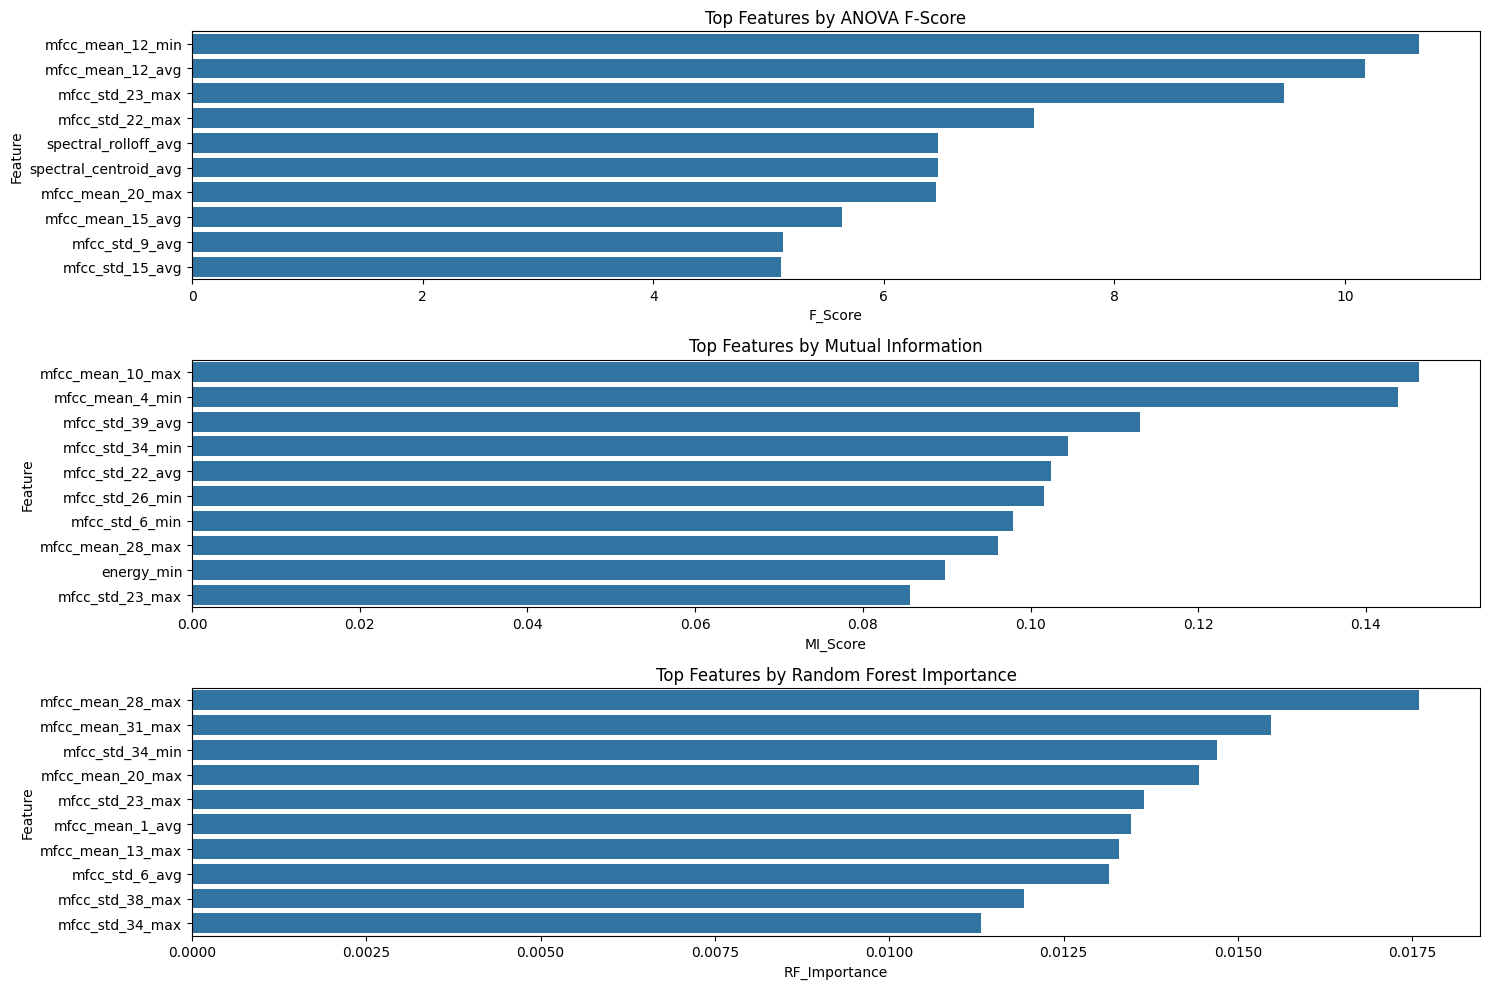


Top 20 Features (by average rank across methods):
                  Feature      Score
72       mfcc_mean_12_min  10.638418
74       mfcc_mean_12_avg  10.174902
142       mfcc_std_23_max   9.473283
136       mfcc_std_22_max   7.305665
248  spectral_rolloff_avg   6.469802

Classification Report with Selected Features:
              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.47      0.67      0.55        12

    accuracy                           0.59        32
   macro avg       0.60      0.61      0.59        32
weighted avg       0.63      0.59      0.60        32

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        30

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



In [314]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def analyze_feature_importance(X_train, y_train, X_dev, top_features_choose="ANOVA"):
    """
    Analyze feature importance using multiple methods
    """
    n_top_features=10
    results = {}
    
    # 1. ANOVA F-value for binary/multiclass classification
    f_selector = SelectKBest(f_classif, k='all')
    f_selector.fit(X_train, y_train)
    f_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'F_Score': f_selector.scores_
    }).sort_values('F_Score', ascending=False)
    
    # 2. Mutual Information
    mi_selector = SelectKBest(mutual_info_classif, k='all')
    mi_selector.fit(X_train, y_train)
    mi_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'MI_Score': mi_selector.scores_
    }).sort_values('MI_Score', ascending=False)
    
    # 3. Random Forest Feature Importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'RF_Importance': rf.feature_importances_
    }).sort_values('RF_Importance', ascending=False)
    
    # Store results
    results['f_scores'] = f_scores
    results['mi_scores'] = mi_scores
    results['rf_scores'] = rf_scores
    
    # Plot top features from each method
    plt.figure(figsize=(15, 10))
    
    # F-scores
    plt.subplot(3, 1, 1)
    sns.barplot(data=f_scores.head(n_top_features), x='F_Score', y='Feature')
    plt.title('Top Features by ANOVA F-Score')
    
    # Mutual Information
    plt.subplot(3, 1, 2)
    sns.barplot(data=mi_scores.head(n_top_features), x='MI_Score', y='Feature')
    plt.title('Top Features by Mutual Information')
    
    # Random Forest
    plt.subplot(3, 1, 3)
    sns.barplot(data=rf_scores.head(n_top_features), x='RF_Importance', y='Feature')
    plt.title('Top Features by Random Forest Importance')
    
    plt.tight_layout()
    plt.show()
    
    # Find common important features across methods


    # Find common important features across methods based on chosen method
    if top_features_choose == "RF":
        top_features = pd.DataFrame({
            'Feature': X_train.columns,
            'F_Score_Rank': f_scores['Feature'].rank(ascending=True),
            'MI_Score_Rank': mi_scores['Feature'].rank(ascending=True),
            'RF_Rank': rf_scores['Feature'].rank(ascending=True)
        })
        top_features['Average_Rank'] = top_features[['F_Score_Rank', 'MI_Score_Rank', 'RF_Rank']].mean(axis=1)
        top_features = top_features.sort_values('Average_Rank', ascending=True)
        
    elif top_features_choose == "ANOVA":
        top_features = pd.DataFrame({
            'Feature': f_scores['Feature'],
            'Score': f_scores['F_Score']
        })
        top_features = top_features.sort_values('Score', ascending=False)

    
    #top_features['Average_Rank'] = top_features[['F_Score_Rank', 'MI_Score_Rank', 'RF_Rank']].mean(axis=1)
    #top_features = top_features.sort_values('Average_Rank', ascending=True)
    
    print("\nTop 20 Features (by average rank across methods):")
    print(top_features.head(5))
    
    return results, top_features

# Use the function
results, top_features = analyze_feature_importance(X_train, y_train, X_dev, top_features_choose="ANOVA")

# Create a dataset with only the top features
n_features_to_use = 9  # You can adjust this number
top_feature_names = top_features.head(n_features_to_use)['Feature'].values

X_train_selected = X_train[top_feature_names]
X_dev_selected = X_dev[top_feature_names]

# Train and evaluate model with selected features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_dev_selected)
x_pred = clf.predict(X_train_selected)

print("\nClassification Report with Selected Features:")
print(classification_report(y_dev, y_pred))
print(classification_report(y_train, x_pred))

### single guy

Training Accuracy: 0.9528301886792453
Development Accuracy: 0.65625

Classification Report on Development Set:


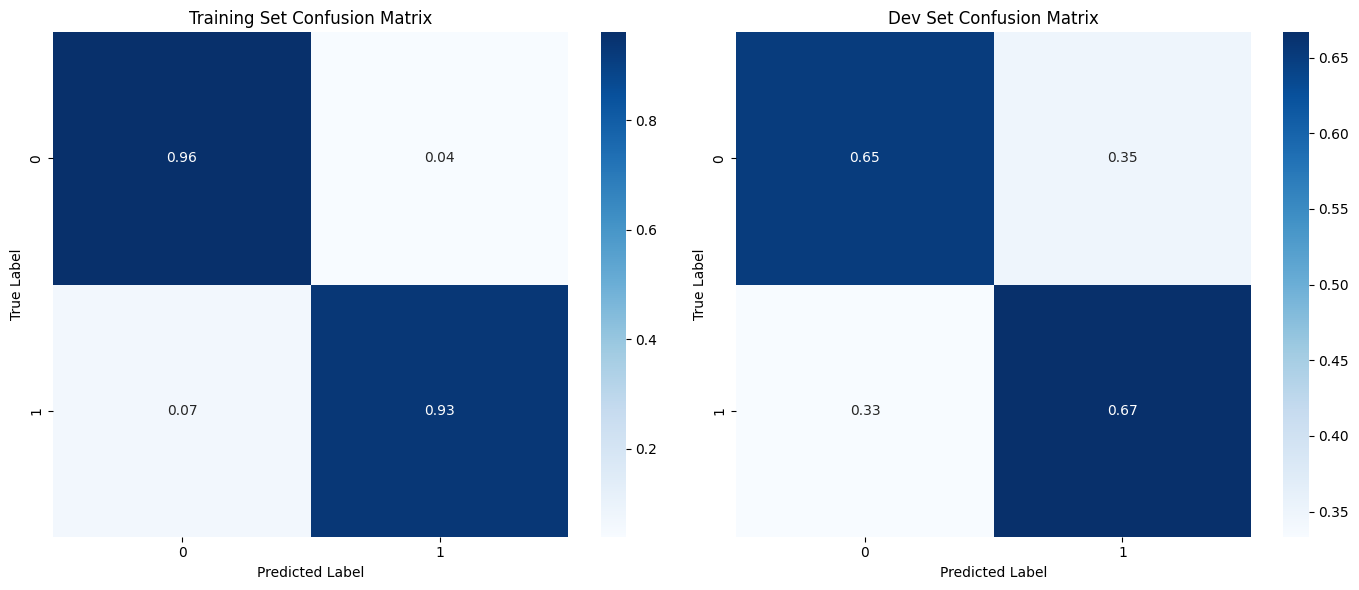

Training Set Metrics:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.90      0.93      0.92        30

    accuracy                           0.95       106
   macro avg       0.94      0.95      0.94       106
weighted avg       0.95      0.95      0.95       106


Dev Set Metrics:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.53      0.67      0.59        12

    accuracy                           0.66        32
   macro avg       0.65      0.66      0.65        32
weighted avg       0.68      0.66      0.66        32



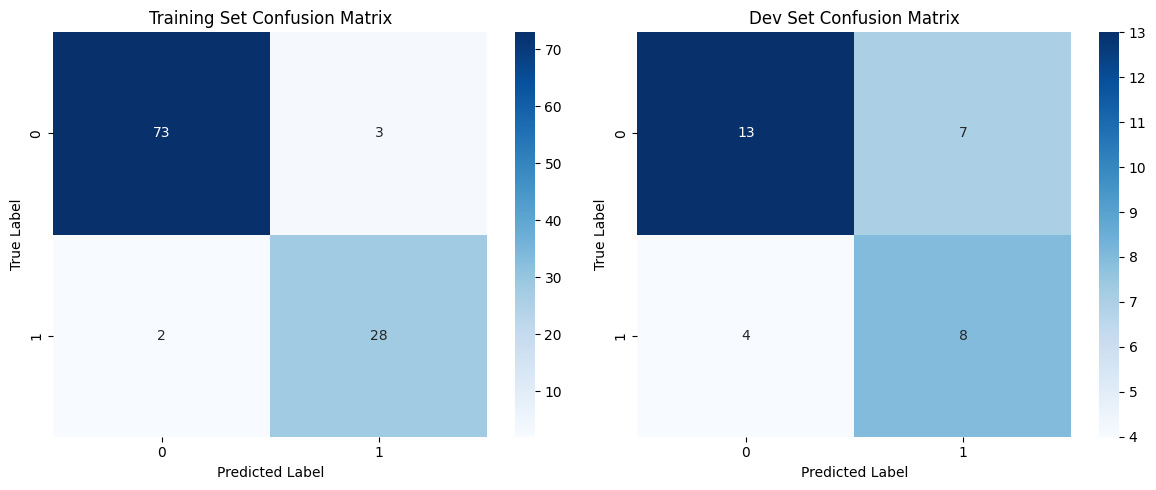

Training Set Metrics:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.90      0.93      0.92        30

    accuracy                           0.95       106
   macro avg       0.94      0.95      0.94       106
weighted avg       0.95      0.95      0.95       106


Dev Set Metrics:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.53      0.67      0.59        12

    accuracy                           0.66        32
   macro avg       0.65      0.66      0.65        32
weighted avg       0.68      0.66      0.66        32



In [316]:
imp.reload(functions_data_viz)
from functions_data_viz import *

f = 9

top_feature_names = top_features['Feature'].head(f).values

# Select data with top 'f' features
X_train_selected = X_train[top_feature_names]
X_dev_selected = X_dev[top_feature_names]

# Train and evaluate model with selected features
DEPTH = 4
clf = DecisionTreeClassifier(random_state=42, max_depth=DEPTH)
# clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_selected, y_train)
y_pred_dev = clf.predict(X_dev_selected)
y_pred_train = clf.predict(X_train_selected)

# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
dev_accuracy = accuracy_score(y_dev, y_pred_dev)

print(f"Training Accuracy: {train_accuracy}")
print(f"Development Accuracy: {dev_accuracy}")

# Optionally: Output the classification report for each iteration
print("\nClassification Report on Development Set:")
# print(classification_report(y_dev, y_pred_dev))
plot_confusion_matrices_rate(clf, X_train_selected, y_train, X_dev_selected, y_dev)
plot_confusion_matrices_original(clf, X_train_selected, y_train, X_dev_selected, y_dev)

#### Find the best model

In [315]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Placeholder for metrics tracking
best_metrics = {
    'f1_score': 0,
    'accuracy': 0,
    'best_features': 0
}

for f in range(1, 31):  # Adjust upper range as needed
    print(f"\nNumber of features: {f}")
    # Select top 'f' features
    top_feature_names = top_features['Feature'].head(f).values

    # Select data with top 'f' features
    X_train_selected = X_train[top_feature_names]
    X_dev_selected = X_dev[top_feature_names]

    # Train and evaluate model with selected features
    DEPTH = range(1, 20)
    for depth in DEPTH:
        clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
        clf.fit(X_train_selected, y_train)
        y_pred_dev = clf.predict(X_dev_selected)

        # Obtain classification metrics
        report = classification_report(y_dev, y_pred_dev, output_dict=True)
        f1 = report['weighted avg']['f1-score']
        acc = accuracy_score(y_dev, y_pred_dev)
        
        # Optionally calculate AUC-ROC for binary classification
        if len(np.unique(y_dev)) == 2:
            roc_auc = roc_auc_score(y_dev, clf.predict_proba(X_dev_selected)[:, 1])
        else:
            roc_auc = None

        # Update best metrics based on F1 score or another chosen metric
        if f1 > best_metrics['f1_score']:
            best_metrics['f1_score'] = f1
            best_metrics['accuracy'] = acc
            best_metrics['best_features'] = f
            best_metrics['roc_auc'] = roc_auc
            best_depth = depth

        print(f"F1-score: {f1}, Accuracy: {acc}, Depth: {depth}")

print("\nBest model performance:")
print(f"Best F1-score: {best_metrics['f1_score']} at {best_metrics['best_features']} features, depth: {best_depth}")
print(f"Best Accuracy: {best_metrics['accuracy']}")
if roc_auc:
    print(f"Best ROC-AUC: {best_metrics['roc_auc']}")


Number of features: 1
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 1
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 2
F1-score: 0.6354166666666666, Accuracy: 0.6875, Depth: 3
F1-score: 0.5181159420289855, Accuracy: 0.5625, Depth: 4
F1-score: 0.5628654970760234, Accuracy: 0.59375, Depth: 5
F1-score: 0.5628654970760234, Accuracy: 0.59375, Depth: 6
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 7
F1-score: 0.5625, Accuracy: 0.5625, Depth: 8
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 9
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 10
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 11
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 12
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 13
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 14
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 15
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 16
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 17


C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 18
F1-score: 0.5346153846153847, Accuracy: 0.53125, Depth: 19

Number of features: 2
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 1
F1-score: 0.5091836734693878, Accuracy: 0.59375, Depth: 2
F1-score: 0.6301169590643274, Accuracy: 0.65625, Depth: 3
F1-score: 0.5869565217391304, Accuracy: 0.625, Depth: 4
F1-score: 0.6045454545454546, Accuracy: 0.625, Depth: 5
F1-score: 0.5386363636363636, Accuracy: 0.5625, Depth: 6
F1-score: 0.5141196013289037, Accuracy: 0.53125, Depth: 7
F1-score: 0.47256410256410253, Accuracy: 0.46875, Depth: 8
F1-score: 0.47256410256410253, Accuracy: 0.46875, Depth: 9
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 10
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 11
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 12
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 13
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 14


C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 15
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 16
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 17
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 18
F1-score: 0.44433198380566796, Accuracy: 0.4375, Depth: 19

Number of features: 3
F1-score: 0.6295546558704453, Accuracy: 0.625, Depth: 1
F1-score: 0.5625, Accuracy: 0.625, Depth: 2
F1-score: 0.5694444444444444, Accuracy: 0.5625, Depth: 3
F1-score: 0.6529692470837751, Accuracy: 0.65625, Depth: 4
F1-score: 0.5966666666666667, Accuracy: 0.59375, Depth: 5
F1-score: 0.625, Accuracy: 0.625, Depth: 6
F1-score: 0.625, Accuracy: 0.625, Depth: 7
F1-score: 0.625, Accuracy: 0.625, Depth: 8
F1-score: 0.5678137651821862, Accuracy: 0.5625, Depth: 9
F1-score: 0.5678137651821862, Accuracy: 0.5625, Depth: 10
F1-score: 0.5678137651821862, Accuracy: 0.5625, Depth: 11
F1-score: 0.5678137651821862, Accuracy: 0.5625, Depth: 12
F1-score: 0.5678137651821862, Accuracy: 0.5625, D

C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 8
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 9
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 10
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 11
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 12
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 13
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 14
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 15
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 16
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 17
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 18
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 19

Number of features: 22
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 1
F1-score: 0.39893617021276595, Accuracy: 0.46875, Depth: 2
F1-score: 0.3484615384615385, Accuracy: 0.34375, Depth: 3
F1-score: 0.5181159420289855, Accuracy: 0.5625, Depth: 4
F1-score: 0.4956140350877193, Accuracy: 

C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 11
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 12
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 13
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 14
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 15
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 16
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 17
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 18
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 19

Number of features: 24
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 1
F1-score: 0.39893617021276595, Accuracy: 0.46875, Depth: 2
F1-score: 0.42532467532467527, Accuracy: 0.4375, Depth: 3
F1-score: 0.5181159420289855, Accuracy: 0.5625, Depth: 4
F1-score: 0.4956140350877193, Accuracy: 0.53125, Depth: 5
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 6
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 7
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 8
F1-score: 0.4727272727272727, A

C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 13
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 14
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 15
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 16
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 17
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 18
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 19

Number of features: 25
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 1
F1-score: 0.44927536231884063, Accuracy: 0.5, Depth: 2
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 3
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 4
F1-score: 0.41051282051282045, Accuracy: 0.40625, Depth: 5
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 6
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 7
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 8
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 9
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 10
F1-score: 0.

C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 13
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 14
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 15
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 16
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 17
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 18
F1-score: 0.3845514950166113, Accuracy: 0.40625, Depth: 19

Number of features: 26
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 1
F1-score: 0.44927536231884063, Accuracy: 0.5, Depth: 2
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 3
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 4
F1-score: 0.4727272727272727, Accuracy: 0.5, Depth: 5
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 6
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 7
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 8
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 9
F1-score: 0.5267762460233298, Accuracy: 0.53125,

C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

F1-score: 0.4283625730994152, Accuracy: 0.46875, Depth: 14
F1-score: 0.4283625730994152, Accuracy: 0.46875, Depth: 15
F1-score: 0.4283625730994152, Accuracy: 0.46875, Depth: 16
F1-score: 0.4283625730994152, Accuracy: 0.46875, Depth: 17
F1-score: 0.4283625730994152, Accuracy: 0.46875, Depth: 18
F1-score: 0.4283625730994152, Accuracy: 0.46875, Depth: 19

Number of features: 28
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 1
F1-score: 0.44927536231884063, Accuracy: 0.5, Depth: 2
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 3
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 4
F1-score: 0.5181159420289855, Accuracy: 0.5625, Depth: 5
F1-score: 0.5789036544850499, Accuracy: 0.59375, Depth: 6
F1-score: 0.5789036544850499, Accuracy: 0.59375, Depth: 7
F1-score: 0.5789036544850499, Accuracy: 0.59375, Depth: 8
F1-score: 0.5789036544850499, Accuracy: 0.59375, Depth: 9
F1-score: 0.5789036544850499, Accuracy: 0.59375, Depth: 10
F1-score: 0.5789036544850499, Accuracy: 0.593

C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 16
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 17
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 18
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 19

Number of features: 30
F1-score: 0.4807692307692308, Accuracy: 0.625, Depth: 1
F1-score: 0.44927536231884063, Accuracy: 0.5, Depth: 2
F1-score: 0.46964956195244056, Accuracy: 0.53125, Depth: 3
F1-score: 0.5091836734693878, Accuracy: 0.59375, Depth: 4
F1-score: 0.5141196013289037, Accuracy: 0.53125, Depth: 5
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 6
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 7
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 8
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 9
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 10
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 11
F1-score: 0.5267762460233298, Accuracy: 0.53125, Depth: 12
F1-score: 0.5267762460233298, Accuracy: 0